In [109]:
from google.colab import drive
drive.mount('/content/drive')
import io
#!ls "/content/drive/My Drive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import zipfile

In [0]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/train.zip", 'r')
zip_ref.extractall("/content/drive/My Drive/data")
zip_ref.close()


In [0]:
#!ls "/content/drive/My Drive"

In [40]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [6]:
!ls

drive  sample_data


In [0]:
import librosa.display
import librosa
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

In [0]:
data, sampling_rate = librosa.load('/content/drive/My Drive/data/Train/100.wav')

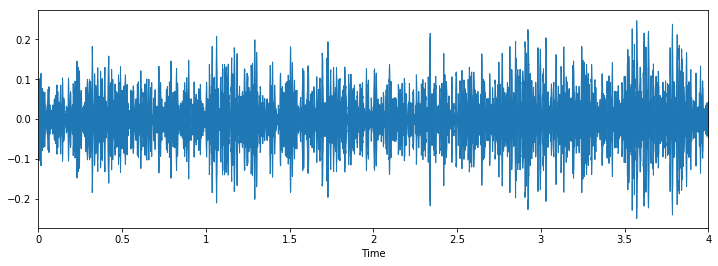

In [44]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [0]:
file_names = glob.glob("/content/drive/My Drive/data/Train/*.wav")

In [49]:
import IPython.display as ipd
ipd.Audio(file_names[10])

In [185]:
type(data)

numpy.ndarray

In [0]:
labels = pd.read_csv('/content/drive/My Drive/data/train.csv')

In [190]:
label = labels.iloc[:,:].values
data.shape

(25104,)

In [197]:
y = []
label

array([[0, 'siren'],
       [1, 'street_music'],
       [2, 'drilling'],
       ...,
       [8727, 'engine_idling'],
       [8728, 'engine_idling'],
       [8729, 'air_conditioner']], dtype=object)

In [203]:
sound_features = []
for file_name in file_names:
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    sound_features.append(mfccs)

"\nsound_features = []\nfor file_name in file_names:\n    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast')\n    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)\n    sound_features.append(mfccs)\n"

In [202]:
file_name

'/content/drive/My Drive/data/Train/105.wav'

In [57]:
len(sound_features)

5435

In [58]:
len(labels)

5435

In [0]:
X = np.asarray(sound_features)

In [62]:
X.shape

(5435, 40)

In [0]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder = LabelEncoder()
onehotencoder = OneHotEncoder(categorical_features =[1])

In [163]:
labels['Class'] = labelencoder.fit_transform(labels['Class'])
y = onehotencoder.fit_transform(labels).toarray()
y = y[:,:-1]
num_labels = y.shape[1]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [164]:
y.shape

(5435, 10)

In [165]:
num_labels

10

In [166]:
y[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

In [0]:
model = Sequential()

model.add(Dense(128, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [184]:
model.fit(X, y, batch_size=32, epochs=10, validation_data = (X_test,y_test))

Train on 5435 samples, validate on 1087 samples
Epoch 1/10
5435/5435 [==============================] - 2s 315us/step - loss: 13.6967 - acc: 0.1121 - val_loss: 2.4494 - val_acc: 0.1104
Epoch 2/10
5435/5435 [==============================] - 0s 75us/step - loss: 13.1666 - acc: 0.1062 - val_loss: 2.3934 - val_acc: 0.1242
Epoch 3/10
5435/5435 [==============================] - 0s 77us/step - loss: 6.4370 - acc: 0.1091 - val_loss: 2.3051 - val_acc: 0.1132
Epoch 4/10
5435/5435 [==============================] - 0s 76us/step - loss: 2.5389 - acc: 0.1117 - val_loss: 2.2894 - val_acc: 0.1113
Epoch 5/10
5435/5435 [==============================] - 0s 74us/step - loss: 2.3930 - acc: 0.1100 - val_loss: 2.2810 - val_acc: 0.1095
Epoch 6/10
5435/5435 [==============================] - 0s 79us/step - loss: 2.3453 - acc: 0.1205 - val_loss: 2.2802 - val_acc: 0.1021
Epoch 7/10
5435/5435 [==============================] - 0s 85us/step - loss: 2.3172 - acc: 0.1246 - val_loss: 2.2802 - val_acc: 0.0994
Epoc

In [0]:
y_pred = model.predict(X_test)

In [0]:
y_labels = np.argmax(y_pred,axis=-1)